In [1]:
import jax
import jax.numpy as jnp

x = jnp.arange(10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [2]:
x

DeviceArray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [3]:
long_vector = jnp.arange(int(1e7))
%timeit jnp.dot(long_vector, long_vector).block_until_ready()

163 µs ± 4.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# JAX first transformation: <code>grad</code>

In [4]:
def sum_of_squares(x):
    return jnp.sum(x**2)

sum_of_squares_dx = jax.grad(sum_of_squares)

x = jnp.asarray([1.0, 2.0, 3.0, 4.0])

print(sum_of_squares(x))

print(sum_of_squares_dx(x))

30.0
[2. 4. 6. 8.]


By default, <code>jax.grad</code> will find the gradient with respect to the first argument.

In [5]:
def sum_squared_error(x, y):
    return jnp.sum((x-y)**2)

sum_squared_error_dx = jax.grad(sum_squared_error)

y = jnp.asarray([1.1, 2.1, 3.1, 4.1])

print(sum_squared_error_dx(x, y))

[-0.20000005 -0.19999981 -0.19999981 -0.19999981]


In [6]:
jax.grad(sum_squared_error, argnums=(0, 1))(x, y)

(DeviceArray([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32),
 DeviceArray([0.20000005, 0.19999981, 0.19999981, 0.19999981], dtype=float32))

```python
def loss_fn(params, data):
    ...
grads = jax.grad(loss_fn)(params, data_batch)
```

# Value and Grad

In [7]:
jax.value_and_grad(sum_squared_error)(x, y)

(DeviceArray(0.03999995, dtype=float32),
 DeviceArray([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32))

# Auxiliary data

In [8]:
def squared_error_with_aux(x, y):
    return sum_squared_error(x, y), x-y

jax.grad(squared_error_with_aux)(x, y)

TypeError: Gradient only defined for scalar-output functions. Output was (DeviceArray(0.03999995, dtype=float32), DeviceArray([-0.10000002, -0.0999999 , -0.0999999 , -0.0999999 ], dtype=float32)).

In [9]:
jax.grad(squared_error_with_aux, has_aux=True)(x, y)

(DeviceArray([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32),
 DeviceArray([-0.10000002, -0.0999999 , -0.0999999 , -0.0999999 ], dtype=float32))

<code>has_aux</code> signifies that the function returns a pair, <code>(out, aux)</code>.

# Your first JAX training loop

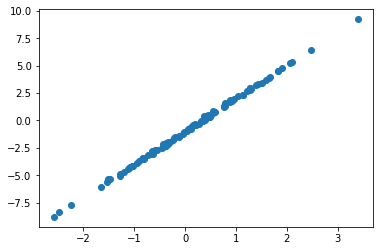

In [13]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = xs * 3 - 1 + noise

plt.scatter(xs, ys);

In [14]:
def model(theta, x):
    w, b = theta
    return w * x + b

In [15]:
def loss_fn(theta, x, y):
    prediction = model(theta, x)
    return jnp.mean((prediction-y)**2)

In [25]:
@jax.jit
def update(theta, x, y, lr=0.01):
    return theta - lr * jax.grad(loss_fn)(theta, x, y)

w: 3.01, b: -1.01


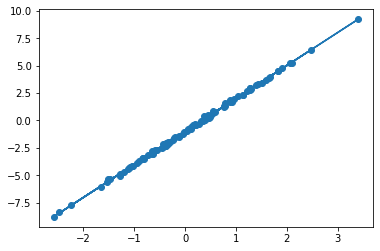

In [26]:
theta = jnp.array([1., 1.])

for _ in range(1000):
    theta = update(theta, xs, ys)
    
plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")